         no    userid   timestamp  timecount           x           y
0    272407  v20-p6-2 -1921015866        0.0    4.241501  669.354148
1    272408  v20-p6-2 -1921015853        0.0    4.241501  669.354148
2    272409  v20-p6-2 -1921015836        0.0    4.241501  669.354148
3    272410  v20-p6-2 -1921015817        0.0    4.241501  669.354148
4    272411  v20-p6-2 -1921015802        0.0    4.241501  669.354148
5    272412  v20-p6-2 -1921015785        0.0    4.241501  669.354148
6    272413  v20-p6-2 -1921015768        0.0    4.241501  669.354148
7    272414  v20-p6-2 -1921015752        0.0    4.241501  669.354148
8    272415  v20-p6-2 -1921015734        0.0    4.241501  669.354148
9    272416  v20-p6-2 -1921015718        0.0    4.241501  669.354148
10   272417  v20-p6-2 -1921015702        0.0    4.241501  669.354148
11   272418  v20-p6-2 -1921015687        0.0    4.241501  669.354148
12   272419  v20-p6-2 -1921015670        0.0    4.241501  669.354148
13   272420  v20-p6-2 -1921015653 

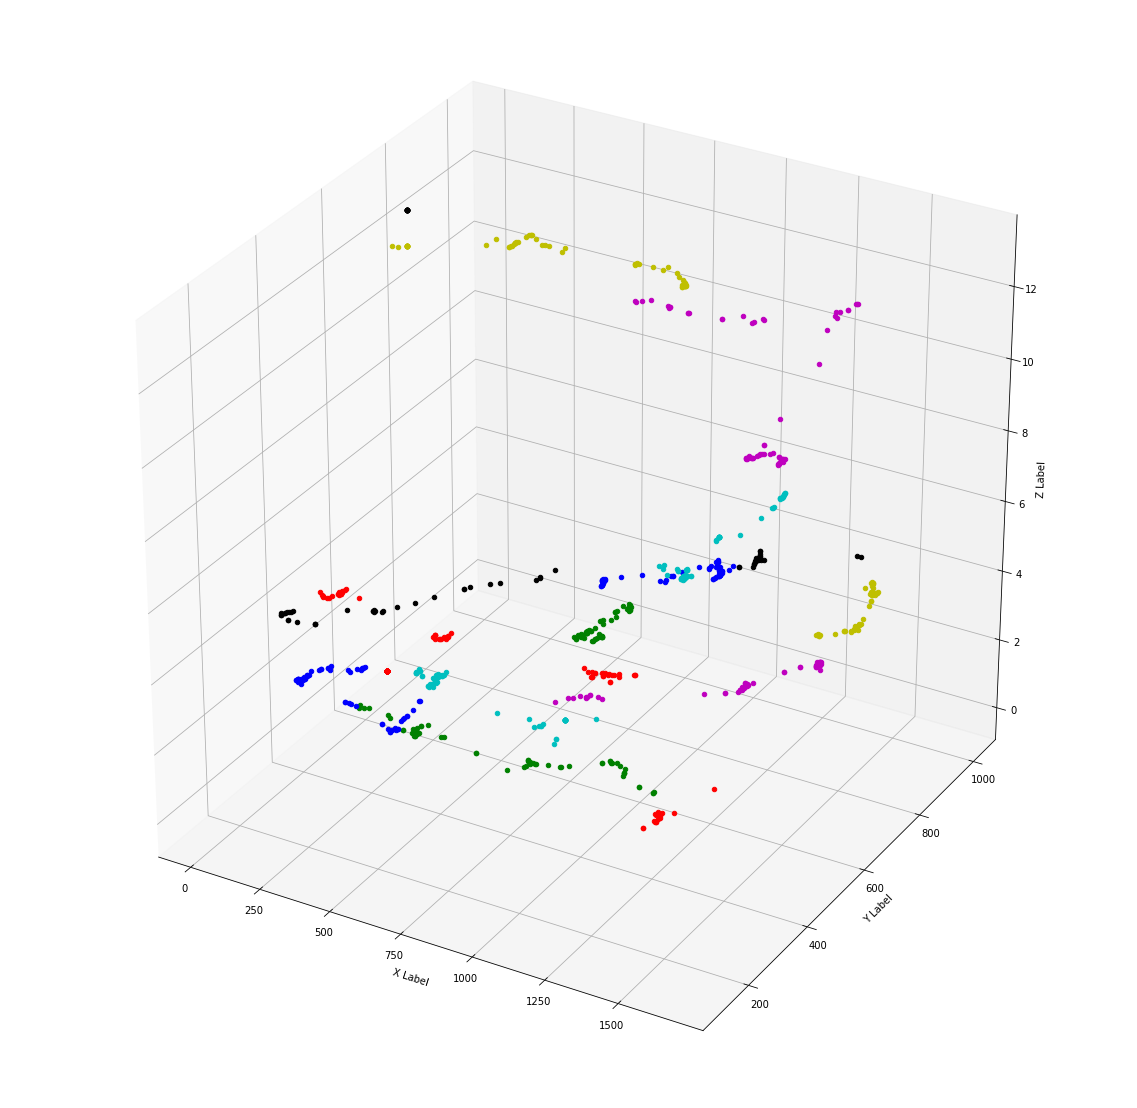

In [6]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#IVT Thhold


#v_threshold = 2000
#v_threshold = 1200
#v_threshold = 830
#v_threshold = 650
#v_threshold = 550
#v_threshold = 430
#v_threshold = 280
v_threshold = 830

dataname='v20-p6-2.csv'
img = plt.imread("p6.png")

df = pd.read_csv(dataname,sep=",", dtype={'x':float,'y':float,'timecount':float},header=None,names=["no","userid","timestamp","timecount","x","y"])

print(df)

temp_tc =df['timecount']
#df['timecount']=df['timecount'].multiply(other = 30) 
df['timecount']=df['timecount']-df['timecount'][0]
df = df.drop(columns=['no', 'userid', 'timestamp'])

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
current_t = -1
cmap = ['r','g','b','c','m','y','k']
asc = -1
count=0
for index, row in df.iterrows():
    if current_t!=row['timecount']:
        current_t=row['timecount']
        asc=(asc+1)%7
        count+=1
    ax.scatter(row['x'], row['y'], row['timecount'], c=cmap[asc], marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
print(count)


In [14]:
#ece k.t.
import numpy as np
import pandas as pd
import sys
import gaze as g
import csv
import time
import datetime
                            
df = pd.read_csv(dataname,sep=",", dtype={'x':float,'y':float,'timecount':float},header=None,names=["no","userid","timestamp","timecount","x","y"])

data = np.array(df)
data_xs = np.unique(data[:,g.x])
data_ys = np.unique(data[:,g.y])
user_ids = np.unique(data[:,g.user_id])

for u in user_ids:
    for q in range(1,2):

        sub_data = data
        sub2d = np.asarray(sub_data).reshape(len(sub_data),6) #this is a numpy array

        centroidsX, centroidsY, time0, time1, fixList, fixations = g.ivt(sub2d,v_threshold)
        #print(fixations)

Tdata = {'X':centroidsX,'Y':centroidsY, 'Time':time0}
#print()
#print(Tdata['X'])
#print() 
# Create DataFrame
df_IVT = pd.DataFrame(Tdata)
print(fixations)
print()
print("FIX CLUSTER LEN : " + str(len(fixations)))
print(df_IVT)
len(df_IVT)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41], [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], [74], [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [90], [91], [92], [93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152], [153], [154, 155, 156, 157], [158], [159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210], [211, 212], [213, 214, 215, 

45

In [16]:
#IVT_IDX = []
#for i in range(0, len(fixations)):
#    IVT_IDX.append(len(fixations[i]))
    
#print(IVT_IDX)
#print()
#print(fixations)
#print()


n_clusters = len(fixations)
clusters = []

_fidxrclu = 0
for _fpi in range(0, n_clusters):
    fpts = []
    fpts.append(df_IVT['X'][_fpi])
    fpts.append(df_IVT['Y'][_fpi])
    fpts.append(df_IVT['Time'][_fpi])
    clusters.append(array([fpts]))
    
print(clusters)

fig = plt.figure(figsize=(20, 20))
fig_sub = []
fig_sub_count=0
IVT_IDX = []

for i in range(1,len(clusters)+1):
    fig_sub.append(fig.add_subplot(9,7,i))
    fig_sub[i-1].title.set_text(i-1)
    fig_sub[i-1].set_xlim([0, 1920])
    fig_sub[i-1].set_ylim([1080, 0])
    fig_sub[i-1].imshow(img, extent=[0, 1920, 1080, 0])
    
for i in range(1,len(clusters)+1):
    fig_sub_count+=1
    tmpres=[]
    for j in clusters[i-1]:
        fig_sub[fig_sub_count-1].scatter(j[0], j[1], c='b', marker='o')
        #tmpres.append(str(int(j[2]/other))+"/"+str(int(j[1]))+"/"+str(int(j[2])))
        tmpres.append(int(df_IVT[(df_IVT['X']==j[0])&(df_IVT['Y']==j[1])&(df_IVT['Time']==j[2])].index[0]))
    IVT_IDX.append(tmpres)
#print(IVT_IDX)

TypeError: array() argument 1 must be a unicode character, not list

In [109]:
'''
save_csv=[]
counts = []

_count = 1
_idx = 0
for _f in fixations:
    _tmpres = []
    for _i in range(min(_f), max(_f)+1):
        #print(_i)
        #_tmpres.append(str(int(_idx))+"/"+str(float(data_xs[_i]))+"/"+str(float(data_ys[_i])))
        _tmpres.append(str(float(data_xs[_i]))+"/"+str(float(data_ys[_i])))
    _tmpres="/".join(_tmpres)    
    #print(_tmpres)
    save_csv.append(_tmpres)
    if _f != 0:
        counts.append(len(_f))
    else:
        counts.append(1)    
    _idx+=1
    
print(counts)    
print(save_csv)
'''
save_csv=[]
counts = []
sub2d = []
sub2d = np.asarray(data).reshape(len(data),6)

for CLUSTER_IDX in IVT_IDX:
    res=[]
    count=0
    for FIX_IDX in CLUSTER_IDX:
        for RAW_IDX in fixations[FIX_IDX]:
            res.append(str(sub2d[RAW_IDX,0])+"/"+str(sub2d[RAW_IDX,4])+"/"+str(sub2d[RAW_IDX,5]))
            count+=1
    res="/".join(res)
    print(res)
    save_csv.append(res)
    counts.append(count)
#print(len(save_csv))

272407/4.241501/669.354148/272408/4.241501/669.354148/272409/4.241501/669.354148/272410/4.241501/669.354148/272411/4.241501/669.354148/272412/4.241501/669.354148/272413/4.241501/669.354148/272414/4.241501/669.354148/272415/4.241501/669.354148/272416/4.241501/669.354148/272417/4.241501/669.354148/272418/4.241501/669.354148/272419/4.241501/669.354148/272420/4.241501/669.354148/272421/4.241501/669.354148/272422/4.241501/669.354148/272423/4.241501/669.354148/272424/4.241501/669.354148/272425/4.241501/669.354148/272426/4.241501/669.354148/272427/4.241501/669.354148/272428/4.241501/669.354148/272429/4.241501/669.354148/272430/4.241501/669.354148/272431/4.241501/669.354148/272432/4.241501/669.354148/272433/4.241501/669.354148/272434/4.241501/669.354148/272435/4.241501/669.354148/272436/4.241501/669.354148/272437/4.241501/669.354148/272438/4.241501/669.354148/272439/4.241501/669.354148/272440/4.241501/669.354148/272441/4.241501/669.354148/272442/4.241501/669.354148/272443/4.241501/669.354148/2

In [110]:
maxd = max(counts)
print(maxd)
for i in range(len(counts)):
    counts[i]=counts[i]/maxd
d = {'data': save_csv, 'counts': counts}
csv_df = pd.DataFrame(d)
print(csv_df)
csv_df.to_csv("data/IVT/clusted_"+dataname,header=False,index=False)

153
      counts                                               data
0   0.261438  272407/4.241501/669.354148/272408/4.241501/669...
1   0.013072  272447/4.241501/669.354148/272448/1253.508268/...
2   0.209150  272449/1212.712824/509.29987/272450/1187.71319...
3   0.006536                272481/977.8668970000001/492.637266
4   0.098039  272482/901.369685/455.85661699999997/272483/87...
5   0.006536                       272497/746.960353/394.803477
6   0.006536                        272498/613.65228/416.193176
7   0.006536                        272499/613.65228/416.193176
8   0.392157  272500/481.30824900000005/432.325759/272501/47...
9   0.006536                        272560/39.532554/366.059842
10  0.026144  272561/215.41432799999998/351.748923/272562/21...
11  0.006536                       272565/255.504162/351.387923
12  0.339869  272566/385.03443599999997/321.777989/272567/38...
13  0.013072  272618/496.453525/412.67467200000004/272619/75...
14  0.130719  272620/862.14358699999